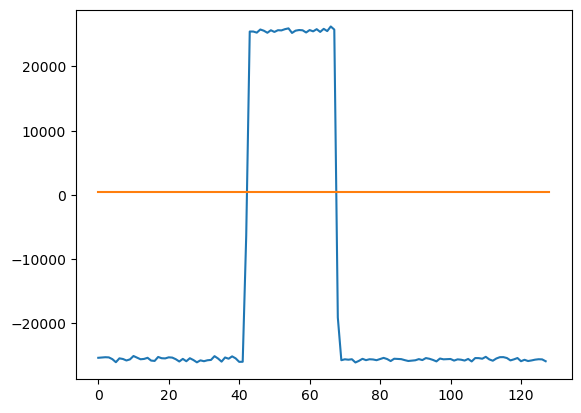

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy

# Let's try a CUSUM implementation for change in mean following Basseville Example 2.1.1

mu0 = 800.0
mu1 = 0
Sigma = 10
NumSamples = 1024 # Number of samples
DropSample = int(NumSamples/3)
DropDuration = int(NumSamples/5)

x = np.concatenate((mu0*np.ones(DropSample), DropLevel*np.ones(DropDuration),
                    StartLevel*np.ones(NumSamples-DropSample-DropDuration)))

xn = x + np.random.normal(0,NoiseStdDev,len(x))


def sufficientStatistic(yi, mu0, mu1, sigma):
    return (mu1-mu0)/sigma/sigma*(yi-(mu0+mu1)/2)

def S1N(yN, mu0, mu1, sigma):
    N = len(yN)
    return np.sum(sufficientStatistic(yN, mu0, mu1, sigma))

def decisionFunction(y, N, mu0, mu1, sigma):
    K = int(len(y)/N)
    values = np.zeros(K)
    
    for k in range(K):
        values[k] = S1N(y[range(k*N, (k+1)*N)], mu0, mu1, sigma)
        
    return values



N = 8
        
decisionValues = decisionFunction(xn, N, mu0, mu1, Sigma)    
    
    
kappa = 100
threshold = mu0 - kappa*Sigma/np.sqrt(N)

plt.figure(3)
plt.plot(decisionValues)
plt.plot([0,len(decisionValues)], [threshold, threshold])


